In [3]:
from scipy.stats import norm

mean = 42
sd = 8

z1 = (20 - mean) / sd
z2 = (30 - mean) / sd
p1 = norm.cdf(z1)
p2 = norm.cdf(z2)
probability = p2 - p1
print(f"Probability that Z-Phone lasts between 20 and 30 months: {probability:.4f}")


Probability that Z-Phone lasts between 20 and 30 months: 0.0638


In [4]:
data = [75, 63, 36, 51, 45, 80, 90]

data.sort()
n = len(data)
median = data[n // 2] if n % 2 == 1 else (data[n // 2] + data[n // 2 - 1]) / 2

print(f"Median failure time (excluding censored): {median} hours")

Median failure time (excluding censored): 63 hours


In [12]:
n = 250
sum_x = 11211.00
sum_y = 44520.80
sum_x2 = 543503.00
sum_xy = 1996904.15

mean_x = sum_x / n
mean_y = sum_y / n

numerator = sum_xy - n * mean_x * mean_y
denominator = sum_x2 - n * mean_x ** 2
slope = numerator / denominator
intercept = mean_y - slope * mean_x

print(f"Slope (b1): {slope}")
print(f"Intercept (b0): {intercept}")

x = 25
y_pred = intercept + slope * x
print(f"Predicted weight for 25-year-old: {y_pred:.4f}")

actual_y = 170
residual = actual_y - y_pred
print(f"Residual: {residual:.4f}")

if residual < 0:
    print("Overestimate")
elif residual > 0:
    print("Underestimate")
else:
    print("Exact prediction")

Slope (b1): 0.010142936231973317
Intercept (b0): 177.6283501676134
Predicted weight for 25-year-old: 177.8819
Residual: -7.8819
Overestimate


Mean: 2.42
Variance: 0.2854
Standard Deviation: 0.5342


/tmp/ipython-input-6-258142149.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2], labels=['Formulation 1', 'Formulation 2'])


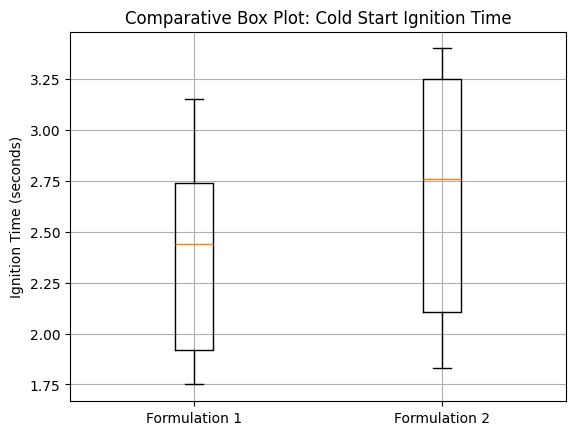

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.array([1.75, 1.92, 2.62, 2.35, 3.09, 3.15, 2.53, 1.91])
mean1 = np.mean(data1)
var1 = np.var(data1, ddof=1)
std1 = np.std(data1, ddof=1)

print(f"Mean: {mean1:.2f}")
print(f"Variance: {var1:.4f}")
print(f"Standard Deviation: {std1:.4f}")

data2 = np.array([1.83, 1.99, 3.13, 3.29, 2.65, 2.87, 3.40, 2.46, 1.89, 3.35])

plt.boxplot([data1, data2], labels=['Formulation 1', 'Formulation 2'])
plt.title("Comparative Box Plot: Cold Start Ignition Time")
plt.ylabel("Ignition Time (seconds)")
plt.grid(True)
plt.show()


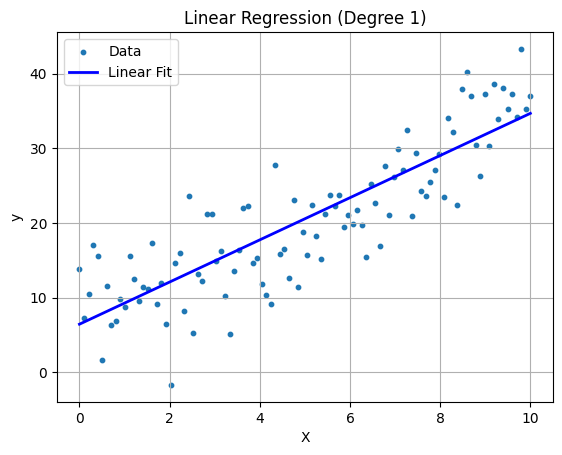

MSE for linear regression: 22.5614


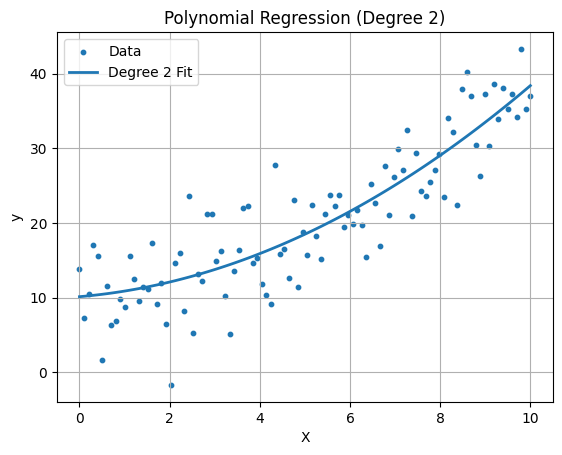

MSE for degree 2: 15.8125


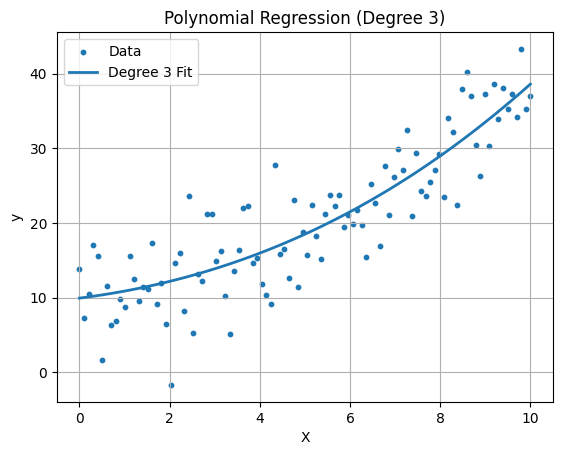

MSE for degree 3: 15.8359


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.flatten() + 5 + np.random.normal(0, 5, size=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

plt.scatter(X, y, s=10, label="Data")
plt.plot(X, model_linear.predict(X), color='blue', label='Linear Fit', linewidth=2)
plt.title('Linear Regression (Degree 1)')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

print(f"MSE for linear regression: {mse_linear:.4f}")

def polynomial_regression(degree):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)

    X_range = np.linspace(0, 10, 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    plt.scatter(X, y, s=10, label="Data")
    plt.plot(X_range, y_range_pred, label=f'Degree {degree} Fit', linewidth=2)
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"MSE for degree {degree}: {mse:.4f}")

polynomial_regression(2)
polynomial_regression(3)
